In [1]:
suppressMessages(library(dplyr))
suppressMessages(library(verification))
suppressMessages(library(class))
library(tree)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Warning message:
"package 'verification' was built under R version 3.6.3"
Warning message:
"package 'fields' was built under R version 3.6.3"
Warning message:
"package 'spam' was built under R version 3.6.3"
Warning message:
"package 'dotCall64' was built under R version 3.6.3"
Warning message:
"package 'maps' was built under R version 3.6.3"
Warning message:
"package 'CircStats' was built under R version 3.6.3"
Warning message:
"package 'dtw' was built under R version 3.6.3"
Warning message:
"package 'proxy' was built under R version 3.6.3"
Warning message:
"package 'class' was built under R version 3.6.3"
Warning message:
"package 'tree' was built under R version 3.6.3"


In [2]:
#setwd('6to Semestre')
#setwd('Temas Selectos de Matemáticas')
#setwd('Covid')

setwd("C:/Users/sole-/Documents/Tecnologia/Sexto semestre/Temas compu")
cv=read.csv("covid.csv",header=T)

cv <- na.omit(cv)
cv=cv%>%tbl_df()
cv=cv%>%filter(as.numeric(RESULTADO)<=1)%>%filter(as.numeric(UCI)<=2)

p = cv %>% filter(UCI == 2) %>% summarize(p=n())  
num_negativo = p[[1]] #total de casos negativos en UCI
p = cv %>% filter(UCI == 1) %>% summarize(p=n())
num_positivos = p[[1]] #numero de casos positivos en UCI

cv_covid_negativo = cv %>% filter(UCI == 2) #numero de los que no necesitaron UCI(cuidado intensivos)
cv_covid_positivo = cv %>% filter(UCI == 1) #numero de los que necesitaron UCI(cuidado intensivos)
h = sample(1:num_negativo,num_positivos,replace = FALSE) #generamos numeros aleatorios
cv_int = cv_covid_negativo %>% slice(h)
cv <- bind_rows(cv_int,cv_covid_positivo)
#cv # 50% contagiados 50% no contagiados, escogidos al azar los no contagiados

#str(cv)
cv$ORIGEN <- as.factor(cv$ORIGEN)
cv$SECTOR <- as.factor(cv$SECTOR)
cv$ENTIDAD_UM<- as.factor(cv$ENTIDAD_UM)
cv$SEXO <- as.factor(cv$SEXO)
cv$ENTIDAD_NAC <- as.factor(cv$ENTIDAD_NAC)
cv$ENTIDAD_RES <- as.factor(cv$ENTIDAD_RES)
cv$MUNICIPIO_RES <- as.factor(cv$MUNICIPIO_RES)
cv$TIPO_PACIENTE <- as.factor(cv$TIPO_PACIENTE)
cv$INTUBADO <- as.factor(cv$INTUBADO )
cv$NEUMONIA  <- as.factor(cv$NEUMONIA )
cv$NACIONALIDAD <- as.factor(cv$NACIONALIDAD)
cv$EMBARAZO <- as.factor(cv$EMBARAZO)
cv$HABLA_LENGUA_INDI <- as.factor(cv$HABLA_LENGUA_INDIG)
cv$DIABETES <- as.factor(cv$DIABETES)
cv$EPOC <- as.factor(cv$EPOC)
cv$ASMA <- as.factor(cv$ASMA)
cv$INMUSUPR  <- as.factor(cv$INMUSUPR  )
cv$HIPERTENSION   <- as.factor(cv$HIPERTENSION  )
cv$OTRA_CON <- as.factor(cv$OTRA_COM)
cv$CARDIOVASCULAR <- as.factor(cv$CARDIOVASCULAR)
cv$OBESIDAD  <- as.factor(cv$OBESIDAD )
cv$RENAL_CRONICA  <- as.factor(cv$RENAL_CRONICA )
cv$TABAQUISMO <- as.factor(cv$TABAQUISMO)
cv$OTRO_CASO  <- as.factor(cv$OTRO_CASO  )
cv$RESULTADO    <- as.factor(cv$RESULTADO  )
cv$MIGRANTE <- as.factor(cv$MIGRANTE)
cv$UCI <- as.factor(cv$UCI)
cv$FECHA_ACTUALIZACION <- as.Date(cv$FECHA_ACTUALIZACION )
cv$FECHA_INGRESO <- as.Date(cv$FECHA_INGRESO)
cv$FECHA_SINTOMAS <- as.Date(cv$FECHA_SINTOMAS)
cv$FECHA_ACTUALIZACION <- as.Date(cv$FECHA_ACTUALIZACION)
attach(cv)
#str(cv)
#summary(UCI)
index <- sample(1:dim(cv), (dim(cv)/2), replace = F)
Train <- cv[index,]
Test <- cv[-index,]


Warning message in 1:dim(cv):
"numerical expression has 2 elements: only the first used"



Call:
glm(formula = UCI ~ NEUMONIA + INTUBADO + DIABETES + ASMA + OBESIDAD + 
    OTRO_CASO, family = "binomial", data = Train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0284  -0.5666  -0.3399   0.8114   2.5492  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.48028    0.28865 -12.057  < 2e-16 ***
NEUMONIA2    0.71127    0.09955   7.145 9.02e-13 ***
INTUBADO2    2.80167    0.11654  24.041  < 2e-16 ***
DIABETES2    0.11160    0.08583   1.300   0.1935    
DIABETES98  -1.47527    0.62422  -2.363   0.0181 *  
ASMA2        0.65778    0.24640   2.670   0.0076 ** 
ASMA98       1.63602    0.86048   1.901   0.0573 .  
OBESIDAD2    0.15899    0.09213   1.726   0.0844 .  
OBESIDAD98   0.51696    0.60773   0.851   0.3950    
OTRO_CASO2   0.09118    0.11049   0.825   0.4092    
OTRO_CASO99  0.80395    0.11432   7.032 2.03e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial fam

[1] 0.54

[1] 0.7532671

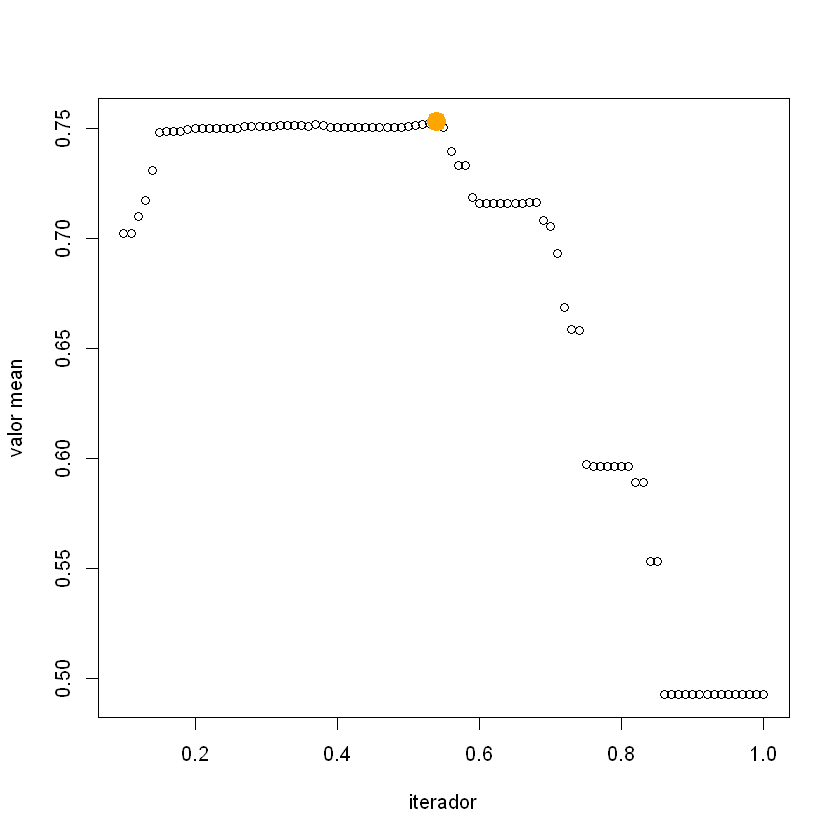

In [3]:
#########LOGISTIC####
glm1<- glm(UCI~ NEUMONIA+INTUBADO+DIABETES+ASMA+OBESIDAD+OTRO_CASO,family="binomial" ,data = Train)
summary(glm1)
yhat2<- predict(glm1, Test,type="response")

#para elegir la mejor y evaluamos los posibles valores, desde 0.1 hasta 1 y vemos cual es el mean menor 
#se repite 91 veces 
size=1
val_mean <- rep(0,91)
for(i in seq(0.1,1,by=0.01)){
  y=as.integer(yhat2>i)
  y=ifelse(y =="0",1,2)
  val_mean[size]=mean(y == Test$UCI)
  size=size+1
}
size=2
lugar=1
mejor=val_mean[lugar]
for(i in seq(0.11,1,by=0.01)){
  if(val_mean[size]>mejor){
    mejor=val_mean[size]
    b=i
    lugar=size
  }
  size=size+1
}
y=seq(0.1,1,by=0.01)
plot(y,val_mean,xlab = "iterador", ylab = "valor mean")
points(b, val_mean[lugar],  col = "orange", lwd = 10)
###valores
b
val_mean[lugar]


[1] 0.7475158

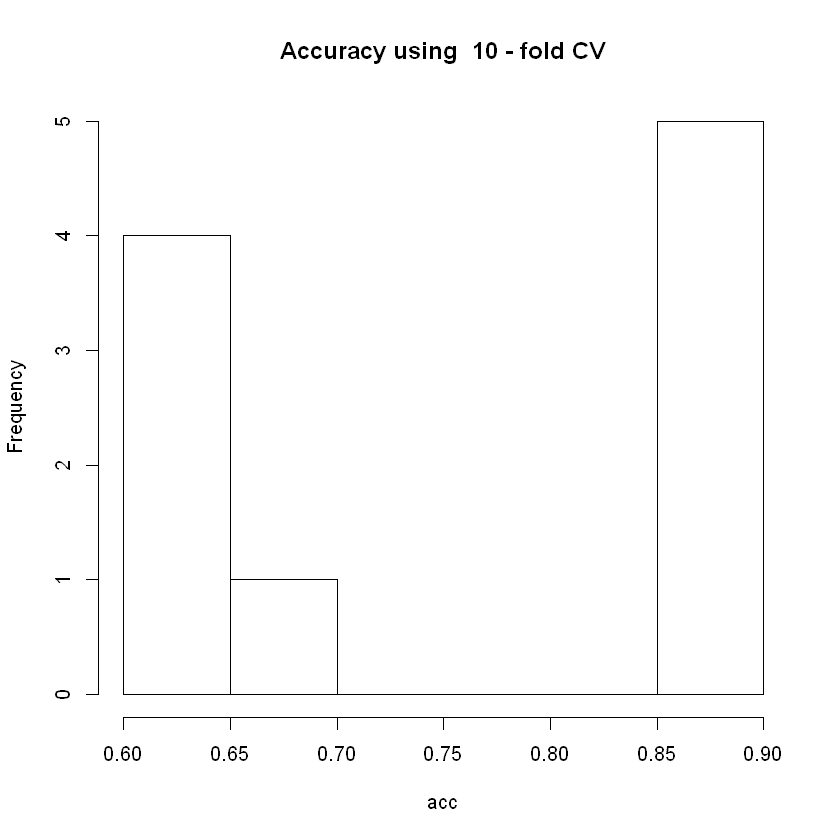

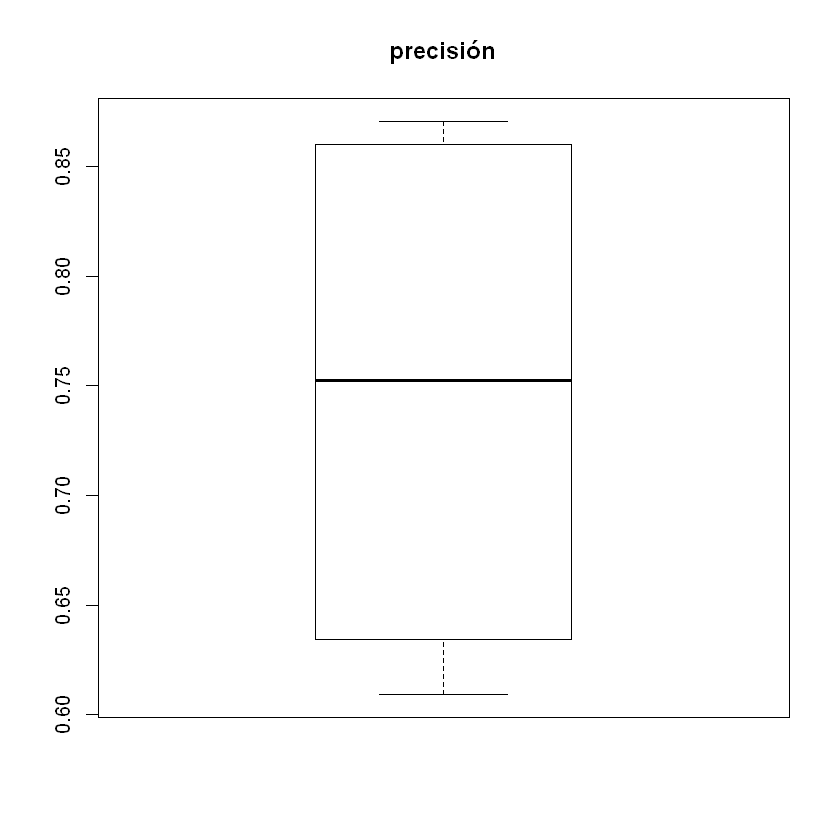

In [4]:

#################### k-folds glm
n <- dim(cv)[1]
k <- 10


folds <- cut(1:n,k,labels = F)
acc = rep(0,k) #presicion del modelo
for (i in 1:k){
  index = folds == i
  test = cv[index,]
  train = cv[-index,]
  reg = glm.c <- glm(UCI~ NEUMONIA+INTUBADO+DIABETES+ASMA+OBESIDAD+OTRO_CASO,family="binomial" ,data = train)
  y=test$UCI
  yhat = predict(reg,test,type = "response")
  res = ifelse(yhat >b,2,1) #Si yhat > 0.5 entonces 1, si no 0
  
  clasiferror <- mean(y != res)
  
  acc[i] = 1 - clasiferror
}
mean(acc) #Presicion promedio del modelo
hist(acc, main = paste("Accuracy using ", k, "- fold CV"))
boxplot(acc,main="precisión")

In [10]:
lda1 <- lda(UCI~ NEUMONIA+INTUBADO+DIABETES+ASMA+OBESIDAD+OTRO_CASO,family="binomial" ,data = Train)
yhat1 <- predict(lda1, Test)$class
table(yhat1,Test$UCI)
mean(yhat1 == Test$UCI)

     
yhat1    1    2
    1 1052  121
    2  833 1820

[1] 0.7506534

[1] 0.7494766

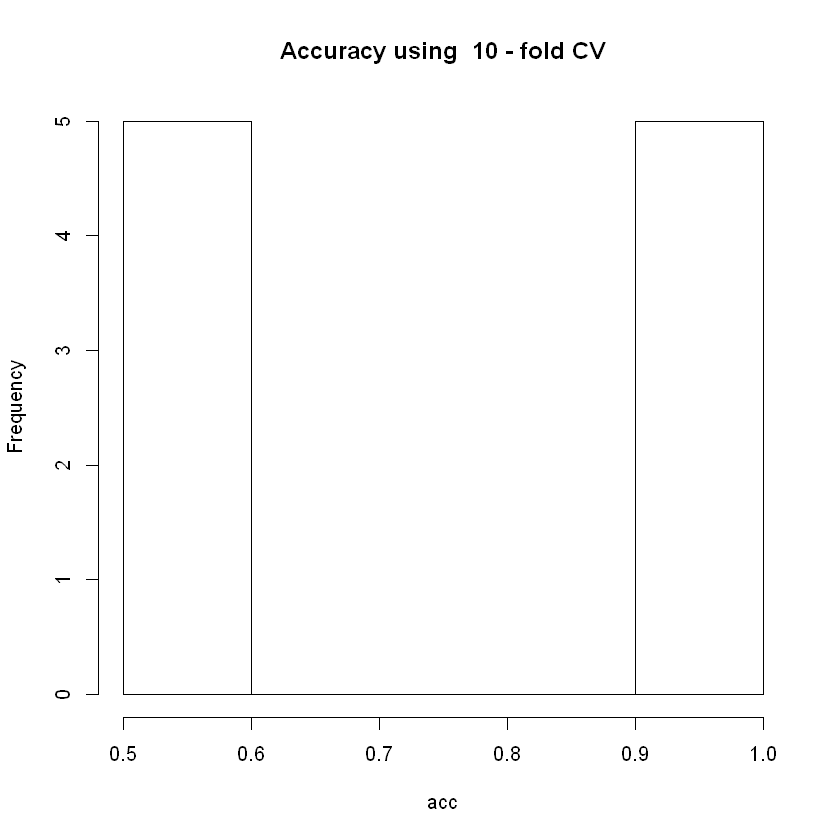

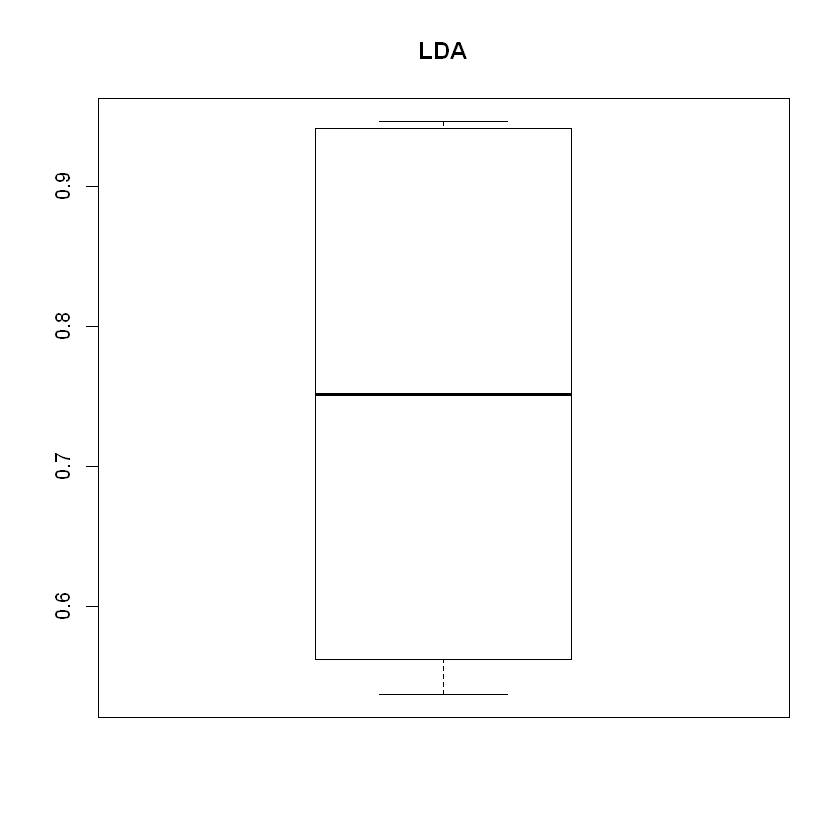

In [6]:
######kfolds lda
n <- dim(cv)[1]
k <- 10
folds <- cut(1:n,k,labels = F)
acc = rep(0,k) #presicion del modelo
for (i in 1:k){
  index = folds == i
  test = cv[index,]
  train = cv[-index,]
  reg = lda(UCI~ NEUMONIA+INTUBADO+DIABETES+ASMA+OBESIDAD+OTRO_CASO,family="binomial" ,data = train)
  
  y = test$UCI
  res = predict(reg, test)$class #Si yhat > 0.5 entonces 1, si no 0
  
  clasiferror <- mean(y != res)
  
  acc[i] = 1 - clasiferror
}
mean(acc) #Presicion promedio del modelo
hist(acc, main = paste("Accuracy using ", k, "- fold CV"))
boxplot(acc,main="LDA",xlabel="Precisión")

[1] "la mejor k fue: "


[1] 9

[1] 0.7503921

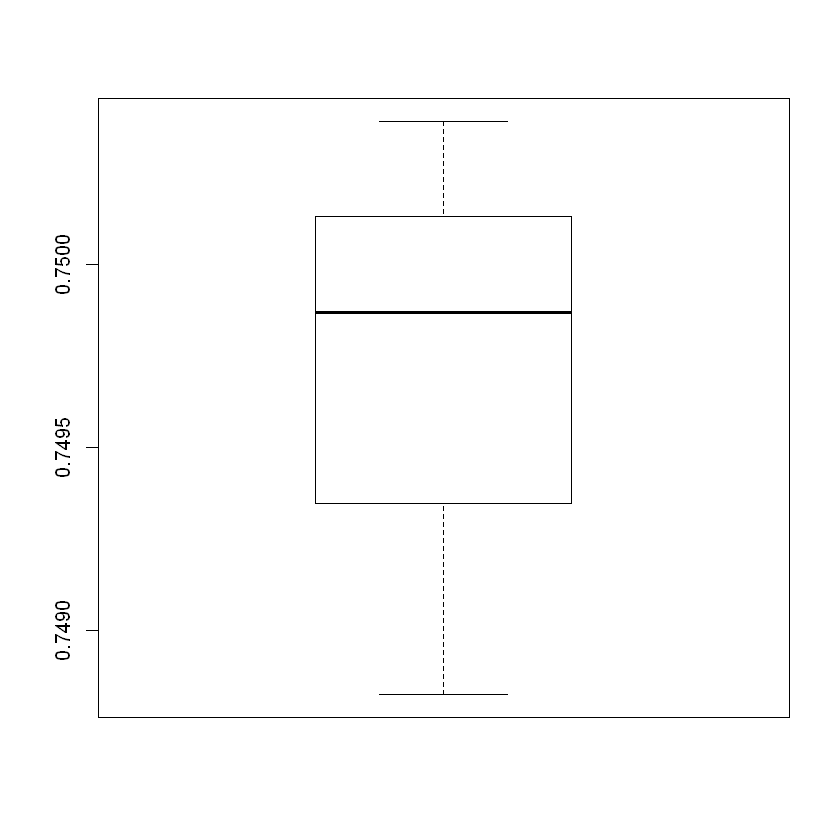

In [7]:
#############KNN#####
knn_val <- rep(1:20)
end= nrow(cv_covid_positivo)#numero de valores
mayor=0
for(n in 1:20){
  knn.pred <- knn(cbind(Train$NEUMONIA,Train$DIABETES,Train$INTUBADO,Train$ASMA,
                        Train$OBESIDAD,Train$OTRO_CASO), 
                  cbind(Test$NEUMONIA,Test$DIABETES,Test$INTUBADO,Test$ASMA,
                        Test$OBESIDAD,Test$OTRO_CASO), Train$UCI, k=n)
  error= mean(Test$UCI == knn.pred)
  knn_val[n]=error
  if(error>mayor){
    mayor=error
    k_best=n
  }
}
print("la mejor k fue: ")
k_best
mayor
boxplot(knn_val)


Classification tree:
tree(formula = UCI ~ NEUMONIA + INTUBADO + DIABETES + ASMA + 
    OBESIDAD + OTRO_CASO, data = Train)
Variables actually used in tree construction:
[1] "INTUBADO"  "OTRO_CASO" "NEUMONIA" 
Number of terminal nodes:  4 
Residual mean deviance:  1.009 = 3857 / 3822 
Misclassification error rate: 0.2533 = 969 / 3826 

         
tree.pred    1    2
        1 1036  102
        2  849 1839

[1] 0.7514375

[1] "size"   "dev"    "k"      "method"

$size
[1] 4 2 1

$dev
[1]  969  969 1885

$k
[1] -Inf    0  916

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

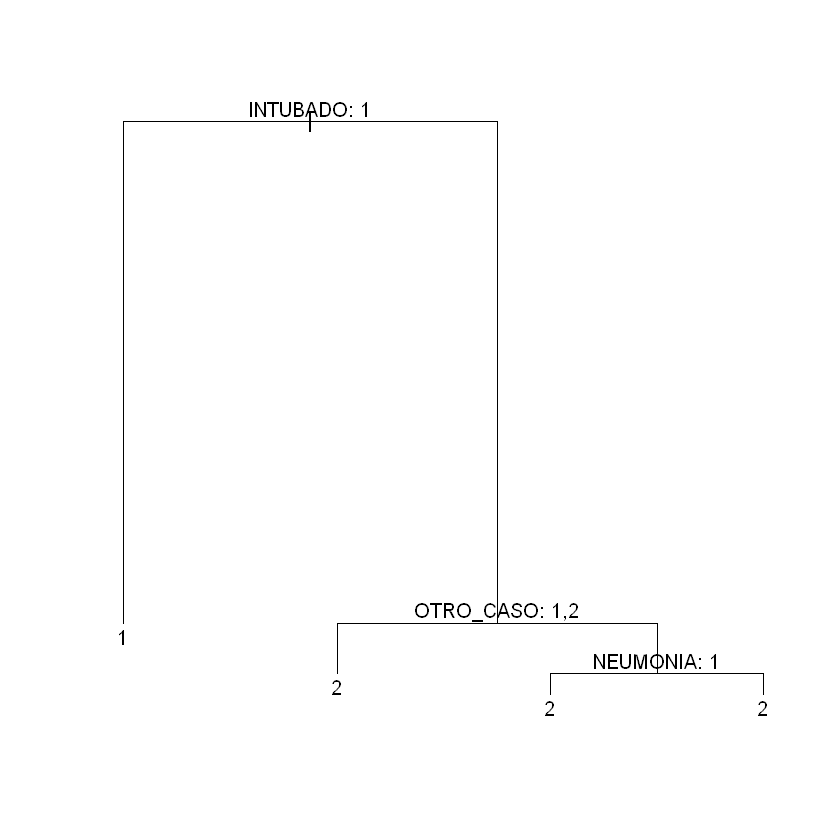

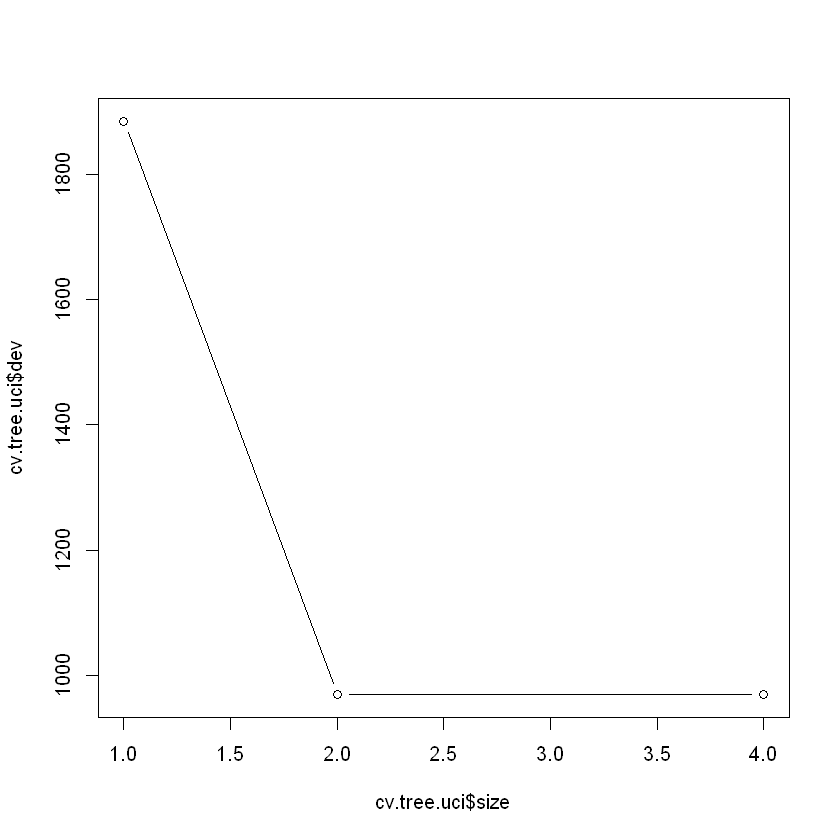

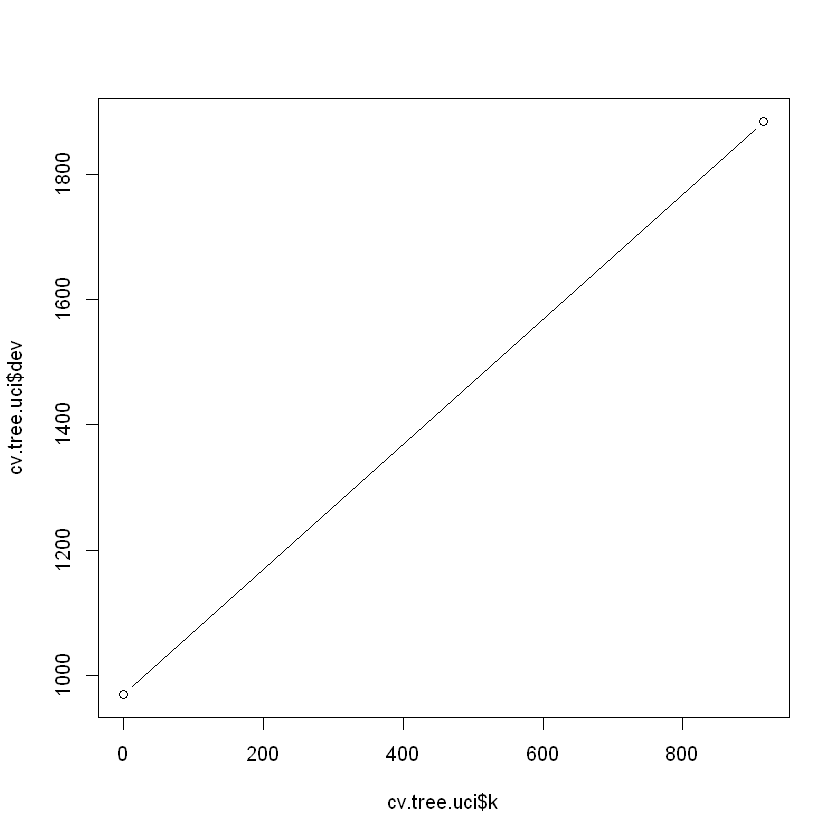

In [8]:
#########decision tree#####
tree.UCI = tree(UCI~ NEUMONIA+INTUBADO+DIABETES+ASMA+OBESIDAD+OTRO_CASO ,data = Train)
summary(tree.UCI)
plot(tree.UCI)
text(tree.UCI, pretty=0)
tree.pred = predict(tree.UCI, Test, type="class")
table(tree.pred,Test$UCI)
mean(tree.pred==Test$UCI)

cv.tree.uci = cv.tree(tree.UCI, FUN = prune.misclass)
names(cv.tree.uci)
cv.tree.uci
plot(cv.tree.uci$size, cv.tree.uci$dev,type="b")
plot(cv.tree.uci$k,cv.tree.uci$dev,type="b")


[1] 0.7490846

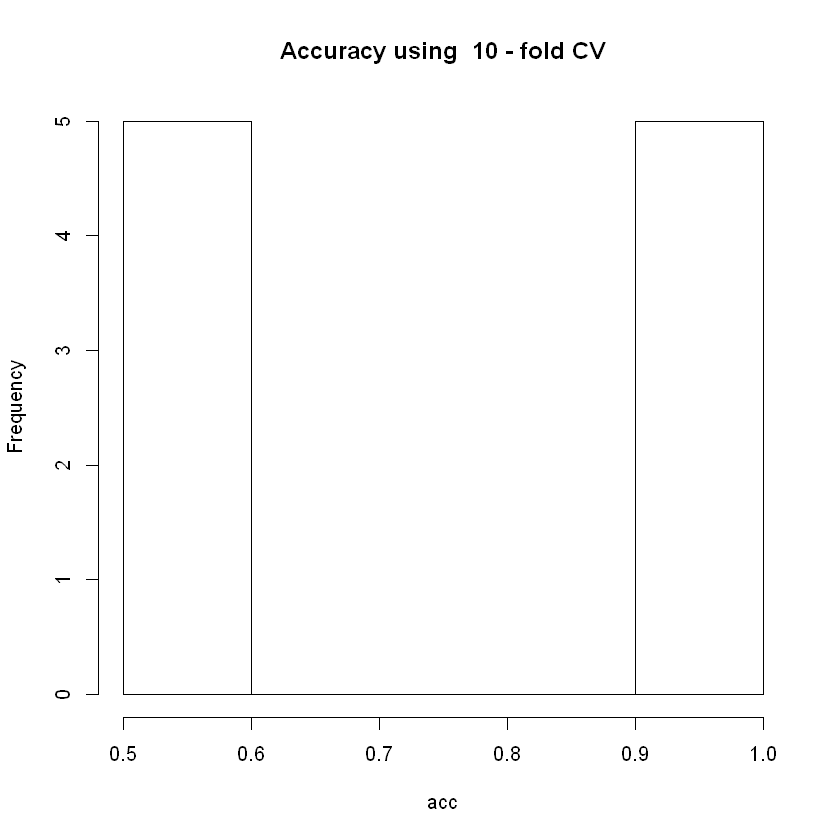

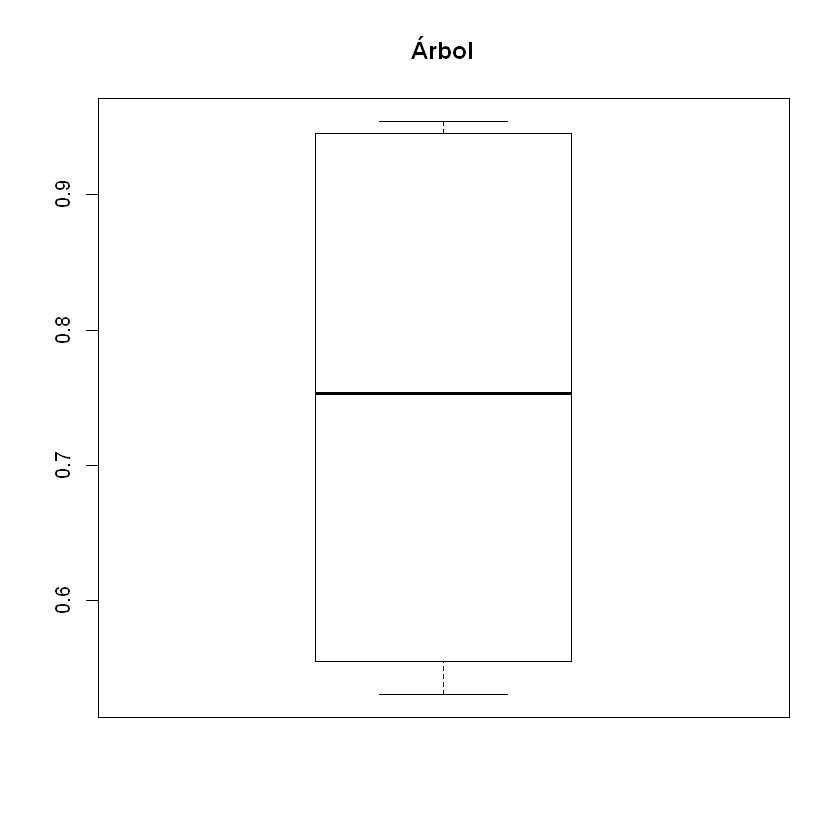

In [9]:
######kfolds tree
n <- dim(cv)[1]
k <- 10


folds <- cut(1:n,k,labels = F)
acc = rep(0,k) #presicion del modelo
for (i in 1:k){
  index = folds == i
  test = cv[index,]
  train = cv[-index,]
  reg =tree(UCI~ NEUMONIA+INTUBADO+DIABETES+ASMA+OBESIDAD+OTRO_CASO ,data = train)
  
  y = test$UCI
  res = predict(reg, test, type="class") #Si yhat > 0.5 entonces 1, si no 0
  
  clasiferror <- mean(y != res)
  
  acc[i] = 1 - clasiferror
}
mean(acc) #Presicion promedio del modelo

hist(acc, main = paste("Accuracy using ", k, "- fold CV"))
boxplot(acc,main="Árbol",xlabel="Precisión")
